# Understanding Backpropagation equations with an example

Backpropagation is probably the most complicated introductory topic when it comes to neural networks. We have to deal with some tedious math and it's easy to loose track of things. We'll approach backpropagation with a *binary* classification example, starting with the derivation of the equations of forward propagation and backpropagation, then we write them in code to verify that everything works. We'll see that with a little patience the basic idea is actually not too complicated. 

We do not put emphasis on the code itself, we keep it simple and without advanced programming patterns, we focus instead on the concepts that make neural networks work.

To reach that goal we choose a fully connected, 3-layer, neural network (see figure below).

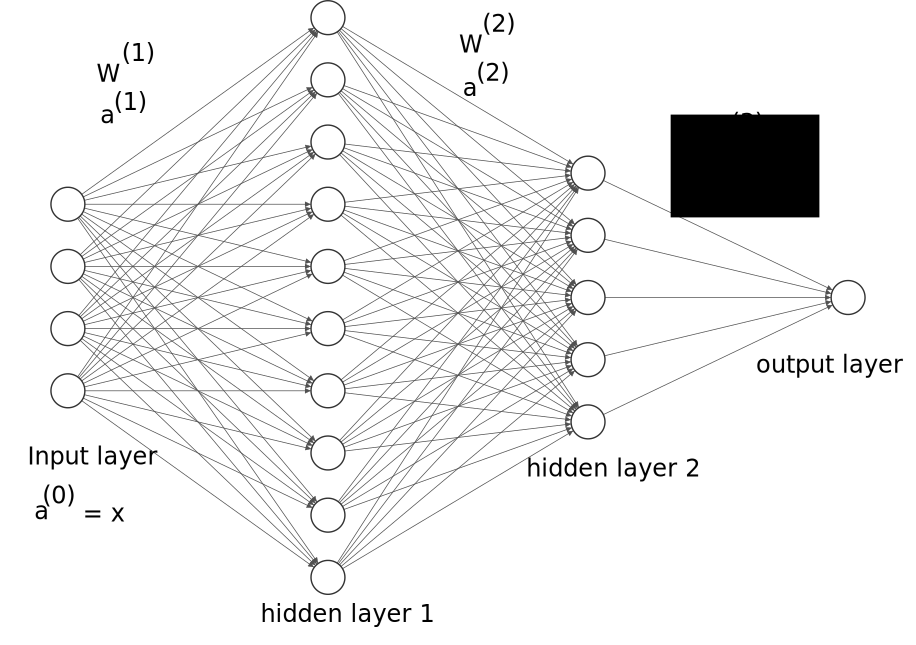

In [22]:
from IPython.display import SVG

SVG('nn3.svg')

Let us define the notation:
- $n^{l}$ is the number of neurons in layer $l$ 
- $W^{(l)}$ is the weights matrix from layer $l-1$ to layer $l$. It has dimensions ($n^{(l)} \times n^{(l-1)}$)
- $b^{(l)}$ (not displayed above) is the vector of biases of layer $l$. It has dimensions $n^{(l)} \times 1$
- $a^{(l)}$ is the vector of activations, that is, the output of the layer $l$. It has dimensions  $n^{(l)} \times 1$
- $z^{(l)}$ is the vector of pre-activations. We have $a^{(l)} = f^{(l)}(z^{(l)})$ where $f^{(l)}$ is the *activation function* of layer $l$.
- we indicate with $x$ the input sample and with $y$ the target variable. $\hat{y}$ is the predicted output.

The weights and the biases are the parameters of the network we need to optimize for in order to minimize the output error. At that point the neural network starts to look like a viable model for the dataset that we are studying. It's not all there is to do to have a "good" model (consider for example overfitting) but it's a necessary and fundamental step.

## The three steps of neural network operation

We can divide the operation of neural networks in 3 main steps:
- Foward Propagation, where the output of the network is calculated starting from the input
- Loss/cost function calculation, where the distance of the calculated output from the "true" target variable is calculated
- Backpropagation and parameters update, *this is the part we focus on in this notebook*

## What is the neural network doing. Logistic Regression.
A few words are needed to clarify what is the neuwal network's task. In essence the neural network paradigm is a way to calculate numerically a probability distribution. I want to underline this point of view because calcating probability distributions and comparing their distance are ubiquitous concepts in Machine Learning. Nothing to worry about, let's refer to the binary case to fix some ideas. 

In a binary classification task the samples belong either to class 1 or 0 (or to classes "a" and "b"). If we denote with $y$ the class variable, we have that for each sample $y=1$ or $y=0$. We interpret the target variable $y$ as being a [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) distriuted variable and each sample belongs to one class or the other with probability $p$ or $1 - p$ respectively. In other words, we interpret the ones and zeros as 100% and 0% probability of belonging to one or the other class. If the first sample belongs to class "a" we can associate a "1" to it to indicate that it belongs to class "a" with 100% probability. The second sample perhaps belongs to class "b", we then associate to it a value of "0" that is, it belongs to class "a" with $1 - 1 = 0$ (0%) probability. 

The output of the network $\hat{y}$ should also be interpreted as a probability of a Bernoulli distributed variable that tells us if each sample belongs to one class with probability $q$ and to the other with probability $1 - q$. Now that we have two probability distributions we can calculate their *distance*, that is, the distance between the ground truth and the network calculated "truth". The last step would then be to minimize such distance. 

How do we make the network calculate a Bernoulli distributed variable $\hat{y}$? We apply a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function at its output forcing the network to output a number between 0 and 1 *that we can interpret as a probability*. It's the same idea that is behind [logistic regression](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression).

## Forward Propagation

Forward propagation in a fully connected network is straightforward. The output is calculated by a sequence of matrix multiplications. If we indicate the input to the neural network with $x$ (also equal to $a^{(0)})$ we have that the output of layer 1 is $$a^{(1)} = f^{(1)}(z^{(1)})$$
with $$z^{(1)}=w^{(1)} \cdot a^{(0)} + b^{(1)}.$$

For the generic layer l we have:
$$a^{(l)} = f^{(l)}(z^{(l)})$$
$$z^{(l)} = w^{(l)} \cdot a^{(l-1)} + b^{(l)}$$
where the dot "$\cdot$" is the row-column matrix multiplication. In our case we have l=1, 2, 3 so we need to repeat the previous equations 3 times. For an arbitrary number of layers we just need to put those two equations in a loop, and loop over the number of layers.

## Binary Classification. Loss function.

After the network has made its prediction during forward propagaion (calculating $\hat{y}$) we can compare the "true" probability distribution to the network calculated distribution.
Initially the weights in the matrices $W^{(l)}$ and the biases in the vectors $b^{(l)}$ are initialized randomly so the network won't give us a prediction that is close to the ground truth. To quantify that distance (and to minimize it) we need to comput the loss function. In our case we choose the [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) which is defned as follows for two probability distributions $p$ and $q$:
$$H(p,q) = \sum^C_ip_i\log(q_i),$$
where $C$ is the number of classes. Why the cross entropy? 
For the binary classification problem the formula reduces to: 
$$\mathcal{L} = - (y \log(\hat{y}) + (1 - y) \log(1-\hat{y})).$$ 
We feed one sample with one sample at a time, calculate the update of the weights and biases and apply the update for each sample, that is we choose the *on line* gradient descent training. It is probably the simplest way to train a network so it doesn't clutter us with more code. In the *batch* training version instead, we calculate the update of the weights and biases for each sample but we apply it only when all the samples in the batch have been presented to the network. Batch training is out of the scope of this article but the reader can see for example [here](http://axon.cs.byu.edu/papers/Wilson.nn03.batch.pdf).

## Backpropagation

We now discuss the real reson why we are here, that is, the equations of *backpropagation*. The goal of backpropagation is to minimize the loss function by calculating by how much we need to change the weights and biases of the network. In the amount by which we need to change the parameters of the network is given by the equations of *gradient descent*:
$$w^{(l)} = w^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial w^{(l)}}$$
$$b^{(l)} = w^{(l)} - \alpha \frac{\partial \mathcal{l}}{\partial b^{(l)}}$$
where the weight $\alpha$ is a scalar number that controls the *learning rate*, that is, how big of a step we let the gradient descent make at each minimization iteration.
All we need to do then is to calculate the partial derivatives in the formulae above. That is readily done by applying the chain rule starting from the output which gives us the following:

$$\frac{\partial \mathcal{L}}{\partial w^{(3)}} = \frac{\partial C}{\partial a^{(3)}}\frac{\partial a^{(3)}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial w^{(3)}} $$, and a similar equation applies for the biases $b^{(3)}$.
At this point we can update the weights of the last layer but we need to calculate the update for the previous layers as well. Going back to the second last layer we have:
$$\frac{\partial \mathcal{L}}{\partial w^{(2)}} = \frac{\partial C}{\partial a^{(3)}}\frac{\partial a^{(3)}}{\partial z^{(3)}} \frac{\partial z^{(3)}}{\partial a^{(2)}} \frac{\partial a^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial w^{(2)}}$$
**to be continued**

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [24]:
def sigmoid(vec):
    """ Sigmoid activation function

    Args:
        vec: input features vector
    """
    return 1/(1 + np.exp(-vec))


def diff_sigmoid(vec):
    """ derivative of the sigmoid 
    
    Args:
        vec: vector with respect to differentiate for
    """
    return sigmoid(vec) * (1. - sigmoid(vec))

In [25]:
class network(object):
    def __init__(self, n_features, alpha=0.01):
        """ Initalize weights and biases of the neural net
            
            Args:
                n_features: number of features in the input matrix
                alpha: learning rate
        """
        self.alpha = alpha

        self.W1 = np.random.normal(0, .1, (10, n_features))
        self.W2 = np.random.normal(0, .1, (5, 10))
        self.W3 = np.random.normal(0, .1, (1, 5)) 
        
        self.b1 = np.ones((10, 1))
        self.b2 = np.ones((5, 1))
        self.b3 = np.ones((1, 1))

        # "memory" of the network
        # we keep intermediate results needed for the backpropagation

        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        self.z3 = None
        self.a3 = None        

    @staticmethod
    def cross_entropy_loss(y_hat, y):
        """ calculates the loss function 
        
            Args:
                y_hat: calculated output array
                y:     ground truth array      
        """
        y_hat = np.squeeze(y_hat)
        loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
        return - loss

    def forward_prop(self, x):
        """ Calculates the output of the neural net

        Args:
            x: input features vector
        """
        self.x = x
        self.z1 = np.dot(self.W1, x) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.W3, self.a2) + self.b3
        self.a3 = sigmoid(self.z3)  # output of the network

        return self.a3
    
    def backprop(self, y_hat, y):
        """ backpropagation 
            
            Args:
                y_hat: array with the prediction (forward propagation)
                y: classes (ground truth)
        """
        self.dCdz3 = y_hat - y
        self.dCdW3 = np.dot(self.dCdz3, self.a2.T)
        self.dCdb3 = self.dCdz3

        self.dCdz2 = np.dot(self.W3.T, self.dCdz3) * diff_sigmoid(self.z2)
        self.dCdW2 = np.dot(self.dCdz2, self.a1.T)
        self.dCdb2 = self.dCdz2

        self.dCdz1 = np.dot(self.W2.T, self.dCdz2) * diff_sigmoid(self.z1)
        self.dCdW1 = np.dot(self.dCdz1, self.x.T)
        self.dCdb1 = self.dCdz1        

        self.update()

    def update(self):
        """ update the weights and biases """
        self.W1 = self.W1 - self.alpha * np.squeeze(self.dCdW1)
        self.W2 = self.W2 - self.alpha * self.dCdW2
        self.W3 = self.W3 - self.alpha * self.dCdW3

        self.b1 = self.b1 - self.alpha * self.dCdb1
        self.b2 = self.b2 - self.alpha * self.dCdb2
        self.b3 = self.b3 - self.alpha * self.dCdb3

In [45]:
iris = datasets.load_iris()
df = np.c_[iris.data, iris.target]
df = df[:100, :]  # binary classification, only 2 classes

np.random.shuffle(df)

X = df[:, :-1]
y = df[:, -1]

minmax = MinMaxScaler()
minmax_x = minmax.fit(X)    
minmax_y = minmax.fit(y.reshape(-1, 1)) 

X = minmax_x.transform(X)    
y = minmax_y.transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

the_net = network(alpha=0.25, n_features=X_train.shape[1])

y_values = np.unique(y_train)

epoch_loss = []    
train_set_accuracy = []
predicted_train_classes = []
predicted_test_classes = []
for epoch in range(0, 100):
    # train and update one sample at a time, "on line" SGD. Go through all the samples
    for sample in range(X_train.shape[0]):
        x = np.expand_dims(X_train[sample, :], axis=1)
        # 1. forward pass
        y_hat = the_net.forward_prop(x)     
        # 2. compute the loss
        loss = the_net.cross_entropy_loss(y_hat, y_train[sample])   
        # 3. backpropagate and update weights and biases
        the_net.backprop(y_hat, y_train[sample])                    

    # calculate training set accuracy at the end of every epoch        
    for i in range(X_train.shape[0]):
        pred = the_net.forward_prop(np.expand_dims(X_train[i, :], axis=1))
        argmin = np.argmin(np.abs(pred - y_values))
        predicted_train_classes.append(y_values[argmin].astype(int))

    epoch_loss.append(loss)
    train_set_accuracy.append(accuracy_score(y_train, predicted_train_classes))
    if epoch % 10 == 0 or epoch == 99:
        print("Epoch = {}".format(epoch))
        print("Average Epoch Loss = {}".format(np.mean(epoch_loss)))
        print("Training set accuracy score = {:1.3f}\n".format(train_set_accuracy[-1]))

    predicted_train_classes = []                

# After the network is trained calculate test set accuracy        
for i in range(X_test.shape[0]):
    pred = the_net.forward_prop(np.expand_dims(X_test[i, :], axis=1))
    argmin = np.argmin(np.abs(pred - y_values))
    predicted_test_classes.append(y_values[argmin].astype(int))       

print("Test set accuracy score = {:1.3f}".format(accuracy_score(y_test, predicted_test_classes)))

Epoch = 0
Average Epoch Loss = 1.0563834815678759
Training set accuracy score = 0.529

Epoch = 10
Average Epoch Loss = 0.412128048899778
Training set accuracy score = 1.000

Epoch = 20
Average Epoch Loss = 0.2181426202480187
Training set accuracy score = 1.000

Epoch = 30
Average Epoch Loss = 0.1484670620024004
Training set accuracy score = 1.000

Epoch = 40
Average Epoch Loss = 0.11259425747845318
Training set accuracy score = 1.000

Epoch = 50
Average Epoch Loss = 0.09071785572309653
Training set accuracy score = 1.000

Epoch = 60
Average Epoch Loss = 0.07597906786554996
Training set accuracy score = 1.000

Epoch = 70
Average Epoch Loss = 0.06537232004157202
Training set accuracy score = 1.000

Epoch = 80
Average Epoch Loss = 0.05737230341176125
Training set accuracy score = 1.000

Epoch = 90
Average Epoch Loss = 0.051122443275839625
Training set accuracy score = 1.000

Epoch = 99
Average Epoch Loss = 0.04656139669392125
Training set accuracy score = 1.000

Test set accuracy score = 

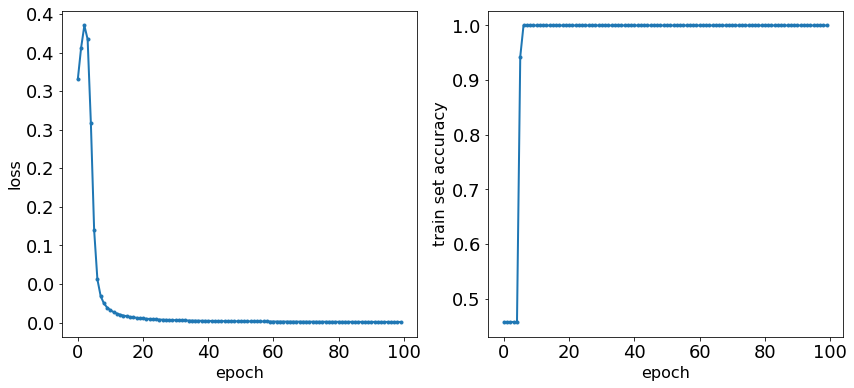

In [27]:
f, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].plot(epoch_loss, marker=".", lw=2)
ax[0].set_xlabel("epoch", fontsize=16)
ax[0].set_ylabel("loss", fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticks().astype(int), fontsize=18)
ax[0].set_yticklabels(np.around(ax[0].get_yticks(), decimals=1), fontsize=18)

ax[1].plot(train_set_accuracy, marker=".", lw=2)
ax[1].set_xlabel("epoch", fontsize=16)
ax[1].set_ylabel("train set accuracy", fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticks().astype(int), fontsize=18)
ax[1].set_yticklabels(np.around(ax[1].get_yticks(), decimals=1), fontsize=18)
plt.show() 

Let's compare some predictions and see if they are really correct

In [52]:
# test set
np.squeeze(y_test[:15]).astype(int).tolist()

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]

In [53]:
# predition
predicted_test_classes[:15]

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]

Looks like we have good predictions, in fact the accuracy is high